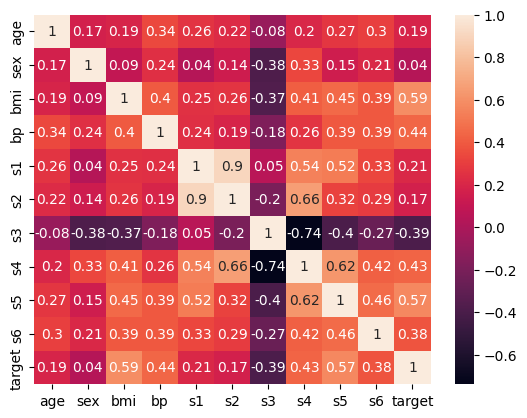

          bmi        s5
0    0.061696  0.019907
1   -0.051474 -0.068332
2    0.044451  0.002861
3   -0.011595  0.022688
4   -0.036385 -0.031988
..        ...       ...
437  0.019662  0.031193
438 -0.015906 -0.018114
439 -0.015906 -0.046883
440  0.039062  0.044529
441 -0.073030 -0.004222

[442 rows x 2 columns]
RMSE (with bmi and s5 feature) - train: 56.560890965481114
R2 (with bmi and s5 feature) - train: 0.4507519215172524
RMSE (with bmi and s5 feature) - test: 57.1759740950605
R2 (with bmi and s5 feature) - test: 0.4815610845742896
RMSE (with bmi, s5, bp feature) - train: 55.32610611166316
R2 (with bmi, s5, bp feature) - train: 0.47447150038132146
RMSE (with bmi, s5, bp feature) - test: 56.6256100515053
R2 (with bmi, s5, bp feature) - test: 0.4914938186648421


"\n\na. The next variable to consider adding would be 's4' because it has the fourth highest correlation with the target (0.43).\n\nb. Adding 's4' improves the model slightly but not significantly. It might not be worth including unless combined with other features.\n\nc. Yes, adding more variables improves performance. The model makes better predictions with more features, but the improvement is moderate\n\nFrom the heatmap, 's4' is the fourth most correlated feature with the target (0.43). If we were to add a fourth feature, it would be 's4'. However, since its correlation is weak (<0.5), adding it may not significantly enhance the model's performance. Additionally, it is crucial to assess the model for potential overfitting.\n"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.datasets import load_diabetes


# Diabetes dataset
data = load_diabetes(as_frame=True)
df = data['frame']

# Correlation using heatmap
sns.heatmap(data=df.corr().round(2), annot=True)
plt.show()

#select 'bmi' and 's5' as independent variables and 'target' as a dependent variables
x_bmi_s5 = pd.DataFrame(df[['bmi','s5']], columns=['bmi','s5'])
y = df[['target']]
print(x_bmi_s5)
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_bmi_s5, y, test_size=0.2, random_state=5)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Evaluate the model on training data
y_train_predict = model.predict(x_train)
rmse_train = root_mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)
print(f'RMSE (with bmi and s5 feature) - train: {rmse_train}')
print(f'R2 (with bmi and s5 feature) - train: {r2_train}')

# Evaluate the model on testing data
y_test_predict = model.predict(x_test)
rmse_test = root_mean_squared_error(y_test, y_test_predict)
r2_test = r2_score(y_test, y_test_predict)
print(f'RMSE (with bmi and s5 feature) - test: {rmse_test}')
print(f'R2 (with bmi and s5 feature) - test: {r2_test}')


# Add 'bp' as an additional feature
x_bmi_s5_bp = pd.DataFrame(df[['bmi', 's5', 'bp']], columns=['bmi', 's5', 'bp'])
y = df[['target']]

# Split the dataset again with the new feature set
x_train, x_test, y_train, y_test = train_test_split(x_bmi_s5_bp, y, test_size=0.2, random_state=5)

# Retrain the model with the additional feature
model.fit(x_train, y_train)

# Evaluate the model with extended feature on training data
y_train_pred = model.predict(x_train)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'RMSE (with bmi, s5, bp feature) - train: {rmse_train}')
print(f'R2 (with bmi, s5, bp feature) - train: {r2_train}')

# Evaluate the model with extended feature on testing data
y_test_pred = model.predict(x_test)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'RMSE (with bmi, s5, bp feature) - test: {rmse_test}')
print(f'R2 (with bmi, s5, bp feature) - test: {r2_test}')

'''

a. The next variable to consider adding would be 's4' because it has the fourth highest correlation with the target (0.43).

b. Adding 's4' improves the model slightly but not significantly. It might not be worth including unless combined with other features.

c. Yes, adding more variables improves performance. The model makes better predictions with more features, but the improvement is moderate

From the heatmap, 's4' is the fourth most correlated feature with the target (0.43). If we were to add a fourth feature, it would be 's4'. However, since its correlation is weak (<0.5), adding it may not significantly enhance the model's performance. Additionally, it is crucial to assess the model for potential overfitting.
'''